# this file is a demo for the data
**源数据文件已被处理，包括转为小写，去除表情、链接、停用词**

In [43]:
import pandas
data = pandas.read_csv('motionClassify.csv')
data.head(5)

,review,sentiment,label
0,one reviewers mentioned watching 1 oz episode ...,positive,1
1,wonderful little production filming technique ...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically theres family little boy jake thinks...,negative,0
4,petter matteis love time money visually stunni...,positive,1


## 构建语料库，通过语料库构建词表，从而将单词编码

In [44]:
lines = [l for l in data['review']]
len(lines)

50000

In [45]:
from nltk.tokenize import word_tokenize
lines = list(map(word_tokenize,lines))

In [46]:
corpus = [word  for l in lines for word in l]# 语料库

In [47]:
len(corpus)

5991959

In [48]:
import vocab
v = vocab.Vocab(corpus)

In [49]:
len(v)

222138

## 看一下每个句子的长度，决定截断的位置

average 119.83918


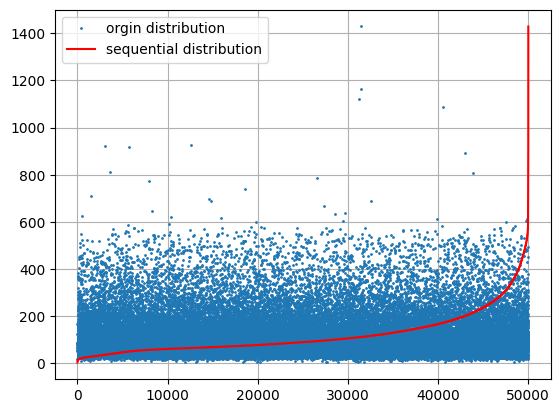

In [50]:
max =0
sum = 0
for i,l in enumerate(lines):
    sum += len(l)
    if len(l)>max:
        max = len(l)
print('average {}'.format(sum/len(lines)))
len_seq = [len(l) for l in lines]
import matplotlib.pyplot as plt
plt.plot(list(range(len(lines))),len_seq,'o',markersize=1,label = 'orgin distribution')
plt.plot(list(range(len(lines))),sorted(len_seq),'r-',label='sequential distribution')
plt.grid()
plt.legend()